## ***1. Import Library's & Upload DataSet with labels***

In [1]:
#Import Library's
import os 
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Upload Dataset
paths = ['/kaggle/input/brain-tumor-mri-dataset/Testing/',
        '/kaggle/input/brain-tumor-mri-dataset/Training/']

In [3]:
#Labels 
labels = os.listdir(paths[0]) #Return a list of all the files and subdirectories within that directory.
labels

['pituitary', 'notumor', 'meningioma', 'glioma']

## ***2. Data Preprocessing for Image Classification***


In [4]:
data = []  # Create an empty list called "data" to store the image data
for i, path in enumerate(paths):
    # Iterate over the "paths" list, assigning each element to "path" and its index to "i"
    for label_int, label_string in enumerate(labels):
        # Iterate over the "labels" list, assigning each element to "label_string" and its index to "label_int"
        for filename in glob.glob(path + label_string + '/*.jpg'):
            # Use the "glob.glob()" function to find all files with the extension ".jpg" in the specified directory
            img = cv2.imread(filename)
            # Read the image file using OpenCV's "imread()" function and assign it to the variable "img"
            data.append([label_int, cv2.resize(img, (32, 32))])
            # Resize the image to a width and height of 320 pixels using OpenCV's "resize()" function
            # Create a list containing the label index and the resized image, and append it to the "data" list

len(data)
# Return the length of the "data" list


7023

## ***3. Data Splitting for Training, Testing, and Validation***

In [5]:
import random
random.Random(0).shuffle(data) 

x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for i, sample in enumerate(data):
    label = sample[0]
    img = sample[1]
    if i<= 0.8*len(data):
        x_train.append(img)
        y_train.append(label)
    elif i>0.8*len(data) and i<=0.9*len(data):
        x_val.append(img)
        y_val.append(label)
    else:
        x_test.append(img)
        y_test.append(label)

x_train = np.array(x_train)
y_train = np.array(y_train)

x_val = np.array(x_val)
y_val = np.array(y_val)

x_test = np.array(x_test)
y_test = np.array(y_test)


In [6]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(5619, 32, 32, 3)
(702, 32, 32, 3)
(702, 32, 32, 3)


## ***4. Image Visualization and Label Display***

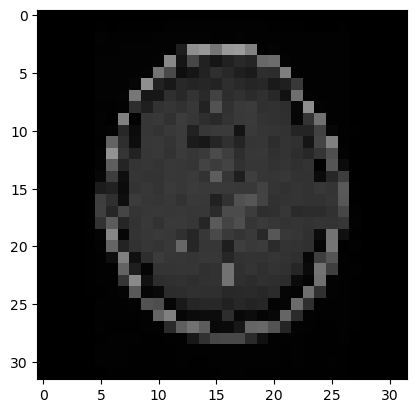

In [7]:
plt.imshow(x_train[3])

## ***5. Data Preparation and Dataset Information Display***

In [8]:
#Library's
import tensorflow as tf
y_trainOneHot=tf.one_hot(y_train,len(labels))
y_valOneHot=tf.one_hot(y_val,len(labels))
y_testOneHot=tf.one_hot(y_test,len(labels))

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

## ***6. TensorFlow and Keras Setup for Deep Learning Mode***

In [9]:
#Library's
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout

## ***7. Convolutional Neural Network (CNN) Architecture for Image Classification***

In [10]:
def cnn_model():
    model = Sequential()
    model.add(Convolution2D(32,(3,3),input_shape=(32,32,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    model.add(Convolution2D(64,(3,3),input_shape=(32,32,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    model.add(Convolution2D(128,(3,3),input_shape=(32,32,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(15,activation='relu'))
    model.add(Dense(4,activation='softmax'))
    model.compile(optimizer='SGD', loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [11]:
model = cnn_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)          0

In [12]:
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
checkpoint=ModelCheckpoint('checkpoint/model.{epoch:d}.h5',save_best_only=False, save_freq='epoch')
tensorboard_callback=TensorBoard('logs/cnn_logs',histogram_freq=1)

In [13]:
print(x_train.shape)
print(x_val.shape)

(5619, 32, 32, 3)
(702, 32, 32, 3)


In [14]:
model.fit(x_train, 
          y_trainOneHot, 
          epochs=50,
          batch_size =32, 
          validation_data = (x_val,y_valOneHot),
          callbacks = [tensorboard_callback, checkpoint])

# Evaluate and print the training accuracy and loss
train_score = model.evaluate(x_train, y_trainOneHot, verbose=0)
print('Train loss: {}, Train accuracy: {}'.format(train_score[0], train_score[1]))

# Evaluate and print the validation accuracy and loss
val_score = model.evaluate(x_val, y_valOneHot, verbose=0)
print('Validation loss: {}, Validation accuracy: {}'.format(val_score[0], val_score[1]))

Epoch 1/50
176/176 [==============================] - 6s 31ms/step - loss: 5.8546 - accuracy: 0.2830 - val_loss: 1.3319 - val_accuracy: 0.3191
Epoch 2/50
176/176 [==============================] - 5s 28ms/step - loss: 1.3256 - accuracy: 0.3550 - val_loss: 1.2667 - val_accuracy: 0.4544
Epoch 3/50
176/176 [==============================] - 5s 30ms/step - loss: 1.2668 - accuracy: 0.4011 - val_loss: 1.2445 - val_accuracy: 0.4544
Epoch 4/50
176/176 [==============================] - 5s 29ms/step - loss: 1.2162 - accuracy: 0.4303 - val_loss: 1.1638 - val_accuracy: 0.4772
Epoch 5/50
176/176 [==============================] - 5s 28ms/step - loss: 1.1886 - accuracy: 0.4339 - val_loss: 1.1781 - val_accuracy: 0.4459
Epoch 6/50
176/176 [==============================] - 5s 28ms/step - loss: 1.1644 - accuracy: 0.4472 - val_loss: 1.1180 - val_accuracy: 0.5071
Epoch 7/50
176/176 [==============================] - 5s 29ms/step - loss: 1.1429 - accuracy: 0.4609 - val_loss: 1.0581 - val_accuracy: 0.5085

model.save("PruebaTecnica.h5")

In [28]:
model.save("CNNTumores.h5")

## ***8. Generate Prediction***

In [15]:
labels[np.argmax(model.predict(x_test[0:1]))]

1/1 [==============================] - 0s 122ms/step


'notumor'

In [16]:
labels[y_test[5]]

'meningioma'

In [17]:
model.evaluate(x=x_test, y=y_testOneHot)

22/22 [==============================] - 0s 8ms/step - loss: 0.4273 - accuracy: 0.8319


[0.42727530002593994, 0.8319088220596313]

## ***9. Predicction with H5***

In [18]:
#Checkpoint
model.load_weights('/kaggle/working/checkpoint/model.48.h5')
model.evaluate(x=x_test, y=y_testOneHot)

22/22 [==============================] - 0s 8ms/step - loss: 0.4729 - accuracy: 0.8048


[0.47294285893440247, 0.8048433065414429]

In [19]:
labels[np.argmax(model.predict(x_test[2:3]))]

1/1 [==============================] - 0s 22ms/step


'pituitary'

In [20]:
labels[y_test[2]]

'pituitary'

## ***10. Confusion Matrix***

In [21]:
prediction_train = model.predict(x_train)
prediction_test = model.predict(x_test)

22/22 [==============================] - 0s 8ms/step


In [22]:
y_pred_train = np.argmax(prediction_train,1)
y_pred_test = np.argmax(prediction_test,1)

In [23]:
#Library's
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matriz = confusion_matrix(y_test,y_pred_test)

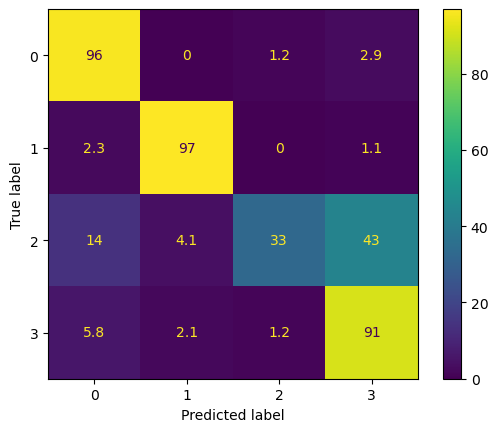

In [24]:
#Confusion Matriz Normalize
matriz_norm = np.round(100*matriz/np.sum(matriz,1),1)
disp2 = ConfusionMatrixDisplay(confusion_matrix=matriz_norm)
disp2.plot()

## ***11. CNN-Features***

In [25]:
conv_features = tf.keras.models.Model(inputs = model.input,
                                      outputs = model.get_layer(index=2).output)

In [26]:
conv_features.predict(x_test[0:1]).shape

1/1 [==============================] - 0s 51ms/step


(1, 15, 15, 32)

In [27]:
conv_features.predict(x_test[0:100]).shape

4/4 [==============================] - 0s 4ms/step


(100, 15, 15, 32)